In [5]:
using JLD2, LinearAlgebra, PyPlot, Tullio, Statistics

In [6]:
tt = ["A", "C", "F", "I", "L", "M", "V", "W", "Y", "P", "H", "K", "R", "D", "E", "N", "Q", "S", "T", "G"];

In [7]:
function int_matr(A; tt = tt, titolo = false, nametitle = "Interaction Matrix")
    matshow(A)
    xticks(0:19,tt)
    yticks(0:19,tt)
    tick_params(axis="both", which="both", bottom=false, top=false)
    if titolo == true
        title(nametitle)
    end        
    colorbar()
end

function zerosumgaug(m; mj = false)
    E_col = mean(m, dims = 2)
    E_row = mean(m, dims = 1)
    E_tot = mean(m)
    if mj == true
        res = -m .+ E_col .+ E_row .- E_tot;
    else
        res = m .- E_col .- E_row .+ E_tot
    end
    return res
end

zerosumgaug (generic function with 1 method)

## Miyazawa Jernigan

In [8]:
@load "../../InteractionMatrix.jld2"

7-element Vector{Symbol}:
 :E
 :E1
 :E2
 :order_MJ
 :order_Martin
 :E1_natural
 :E1_martin

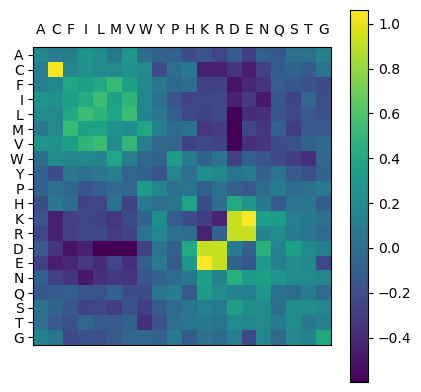

In [9]:
EE = zerosumgaug(E1_martin, mj = true)
int_matr(EE, nametitle= "total martin");


[0.343, 0.183, 0.097, 0.078]


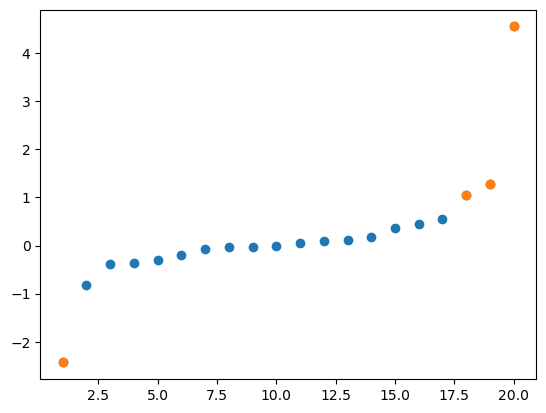

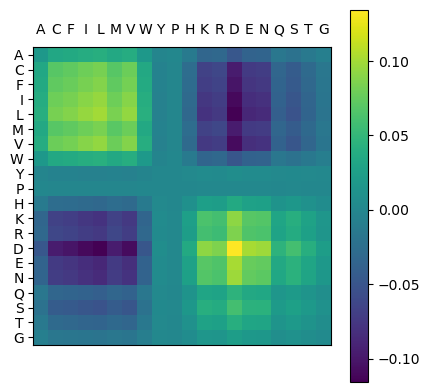

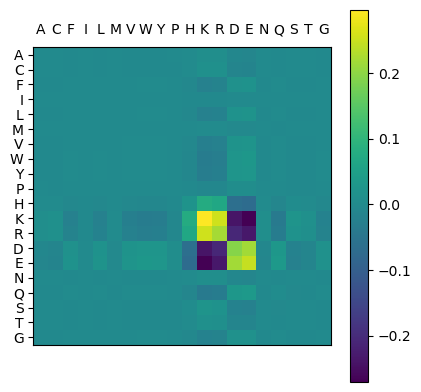

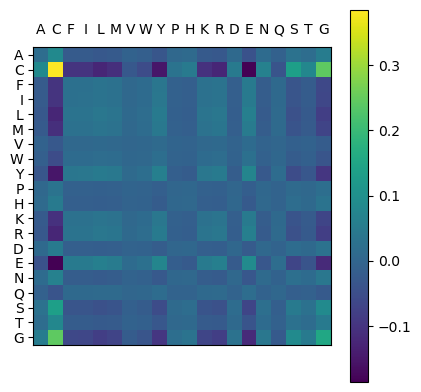

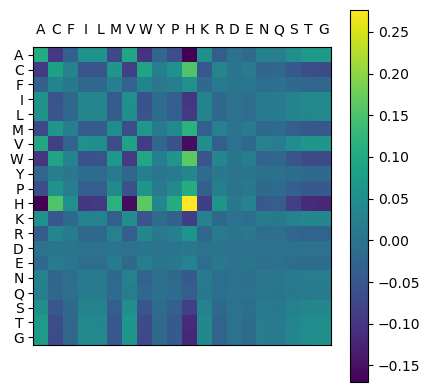

In [10]:
#spectral analysis of mj matrix
l, vv = eigen(EE)
scatter(1:length(l), l);
scatter(sortperm(abs.(l), rev=true)[1:4], l[sortperm(abs.(l), rev=true)][1:4]);
println(round.(abs.(l[sortperm(abs.(l), rev=true)][1:4]) ./ sum(abs.(l)), digits = 3))
for i in 1:4
    int_matr(vv[:,sortperm(abs.(l), rev=true)[i]]' .* vv[:,sortperm(abs.(l), rev=true)[i]]); 
end

## HopfieldDCA reconstructing J like martin H = 20

In [11]:
q = 20; n_eig = 6;

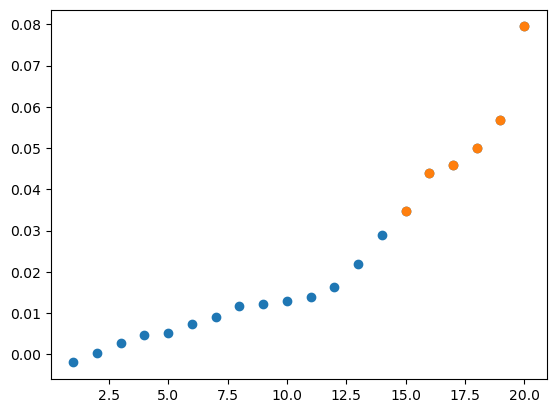

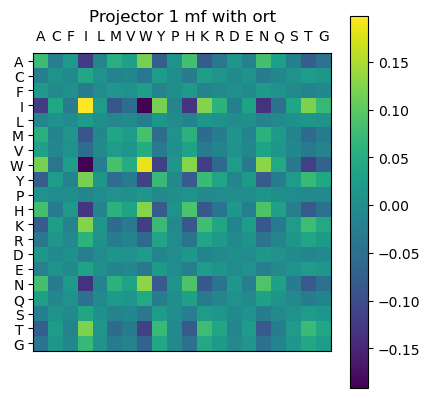

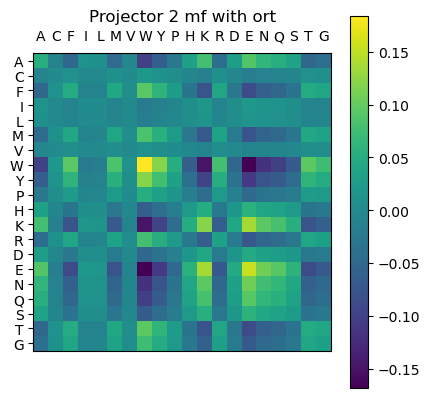

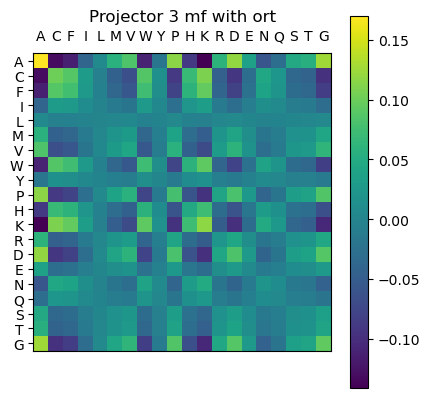

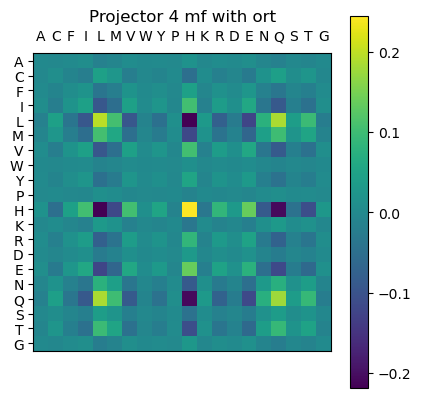

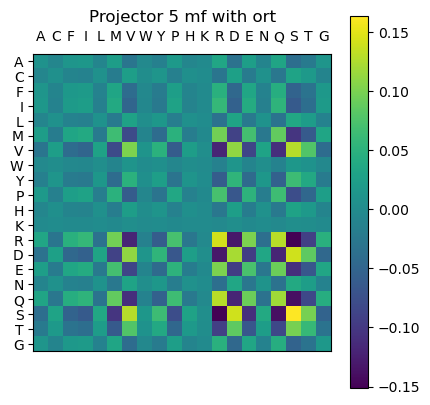

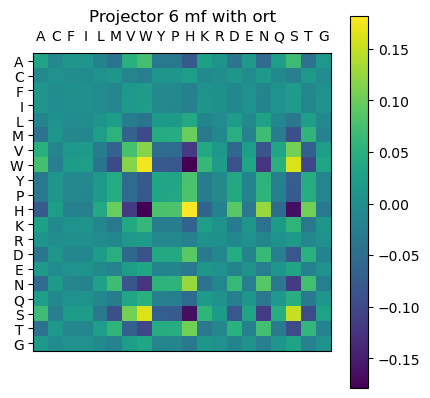

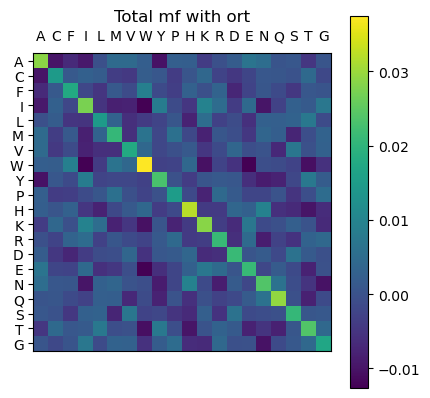

PyObject <matplotlib.colorbar.Colorbar object at 0x7fa83390cd00>

In [19]:
#multifamily
@load "../../multi_fam/orttrue_H21η0.01λ0.001/mf_pars35_H21η0.01λ0.001T90.jld2"
m1 = m ;
Nf = length(m1.Ks);
H = size(m1.V,2)
JJ = [@tullio J[i,j,a,b] := m1.Ks[f][i,j,h]*m1.V[a,h]*m1.V[b,h]*(j!=i) for f in 1:Nf]
J0 = [mean(mean(JJ[f], dims = 3), dims=4) for f in 1:Nf]  
JJ_zs = [JJ[f] .- mean(JJ[f], dims = 3) .- mean(JJ[f], dims = 4) .+ J0[f] for f in 1:Nf]
e_all = mean([dropdims(dropdims(mean(mean(JJ_zs[f], dims = 1), dims=2),dims=1),dims=1) for f in 1:Nf])[1:q,1:q]

l, vv = eigen(e_all[order_Martin,order_Martin])
close("all"); scatter(1:length(l), l)
scatter(sortperm(abs.(l), rev=true)[1:n_eig], l[sortperm(abs.(l), rev=true)][1:n_eig])
ex_var = round.(abs.(l[sortperm(abs.(l), rev=true)][1:n_eig]) ./ sum(abs.(l)), digits = 3) 
#plot(1:n_eig, cumsum(ex_var), label = "Explained Variance")
#plt.legend()
for i in 1:n_eig
    int_matr(vv[:,sortperm(abs.(l), rev=true)[i]]' .* vv[:,sortperm(abs.(l), rev=true)[i]], 
        titolo = true, nametitle = "Projector $(i) mf with ort"); 
end
int_matr(e_all[order_Martin, order_Martin], titolo = true, nametitle = "Total mf with ort")



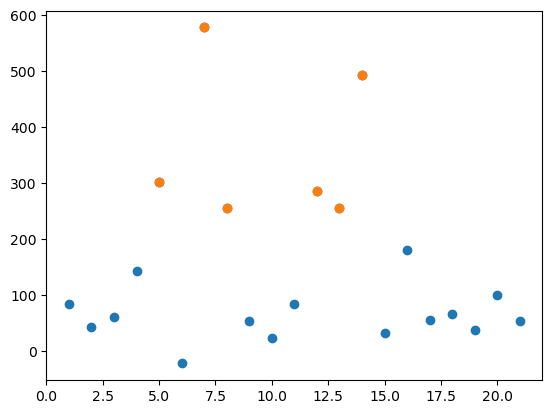

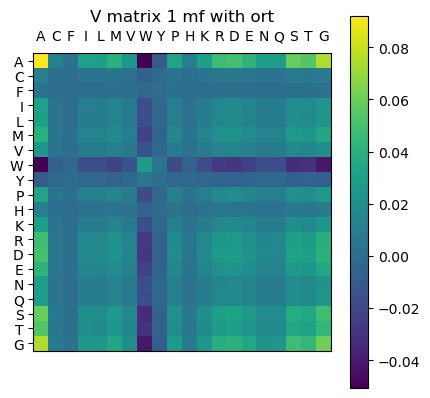

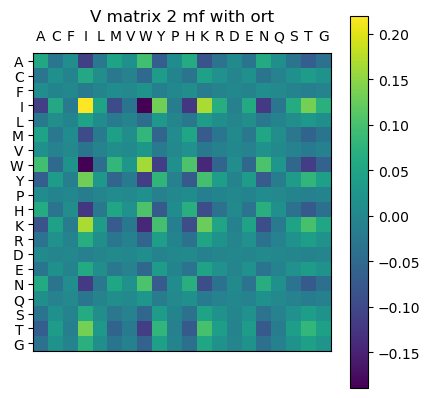

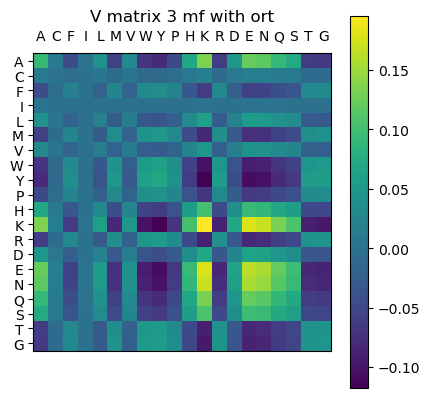

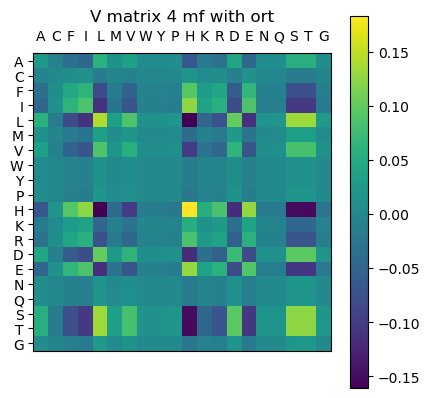

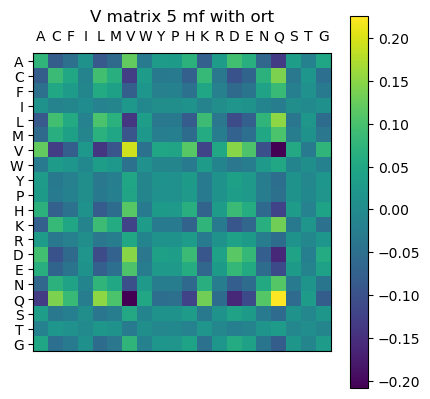

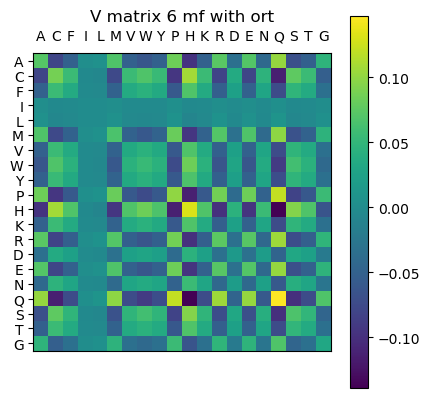

In [16]:
@load "../../multi_fam/orttrue_H21η0.01λ0.001/mf_pars35_H21η0.01λ0.001T90.jld2"
m1 = m ;
@tullio VV[a, b, h] := m1.V[a,h]*m1.V[b,h]
llh = mean([@tullio lam[h] := m1.Ks[f][i,j,h]*(j!=i) for f in 1:Nf]);

close("all"); scatter(1:length(llh), llh)
scatter(sortperm(abs.(llh), rev=true)[1:n_eig], llh[sortperm(abs.(llh), rev=true)][1:n_eig])
ex_var = round.(abs.(llh[sortperm(abs.(llh), rev=true)][1:n_eig]) ./ sum(abs.(llh)), digits = 3) 
#plot(1:n_eig, cumsum(ex_var), label = "Explained Variance")
#plt.legend()
for i in 1:n_eig
    int_matr(VV[order_Martin,order_Martin,sortperm(abs.(llh), rev=true)[i]],
        titolo = true, nametitle = "V matrix $(i) mf with ort"); 
end


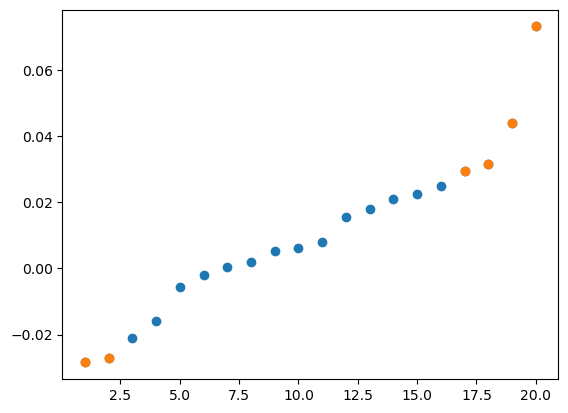

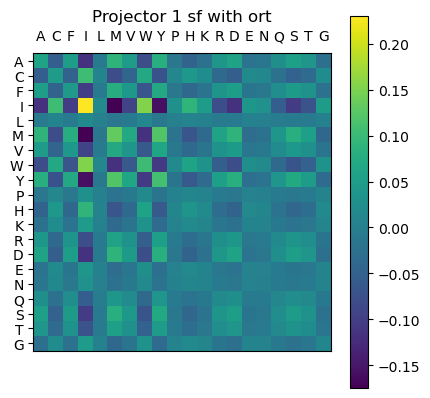

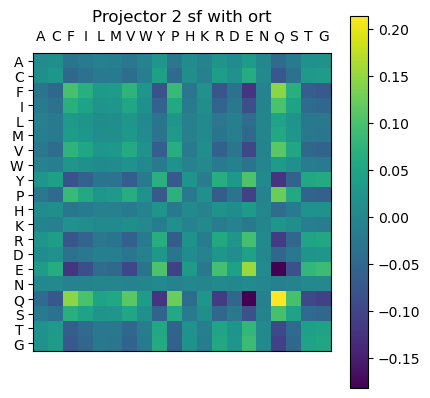

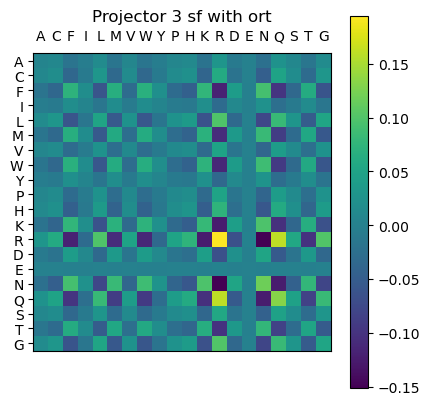

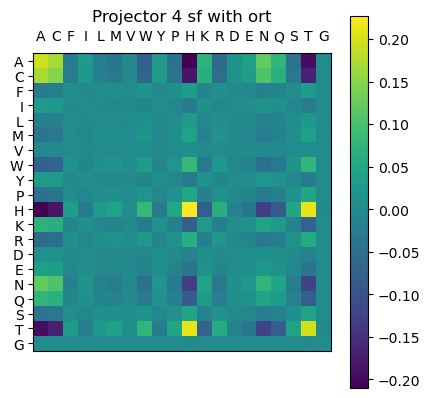

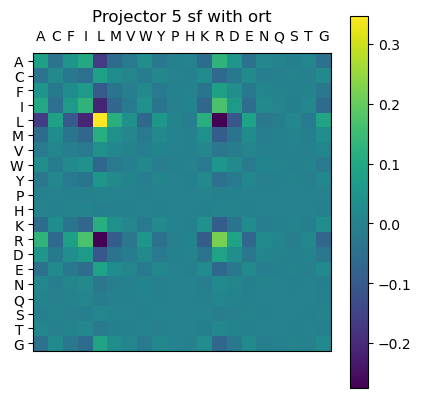

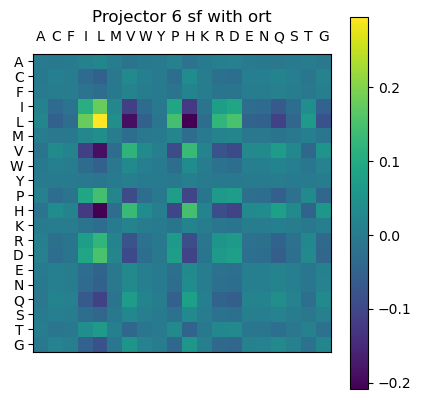

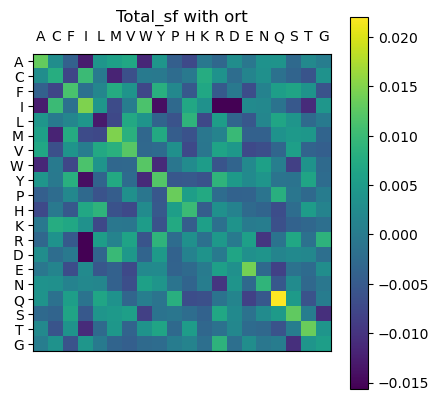

PyObject <matplotlib.colorbar.Colorbar object at 0x7fa838258ca0>

In [18]:
@load "../../DataAttentionDCA/data/PF00014/orttrue_parsH21η0.05λ0.001T60.jld2"
m1 = m ;
#single family
Nf = length(m1.K);
H = size(m1.V,2)

@tullio JJ[i,j,a,b] := m1.K[i,j,h]*m1.V[a,h]*m1.V[b,h]*(j!=i) 
J0 = mean(mean(JJ, dims = 3), dims=4)  
JJ_zs = JJ .- mean(JJ, dims = 3) .- mean(JJ, dims = 4) .+ J0
e_all = dropdims(dropdims(mean(mean(JJ_zs, dims = 1), dims=2),dims=1),dims=1)[1:q,1:q]

l, vv = eigen(e_all[order_Martin, order_Martin])
close("all"); scatter(1:length(l), l)
scatter(sortperm(abs.(l), rev=true)[1:n_eig], l[sortperm(abs.(l), rev=true)][1:n_eig])
ex_var = round.(abs.(l[sortperm(abs.(l), rev=true)][1:n_eig]) ./ sum(abs.(l)), digits = 3) 
#plot(1:n_eig, cumsum(ex_var), label = "Explained Variance")
#plt.legend()
for i in 1:n_eig
    int_matr(vv[:,sortperm(abs.(l), rev=true)[i]]' .* vv[:,sortperm(abs.(l), rev=true)[i]], 
        titolo = true, nametitle = "Projector $(i) sf with ort"); 
end
int_matr(e_all[order_Martin, order_Martin], titolo = true, nametitle = "Total_sf with ort")

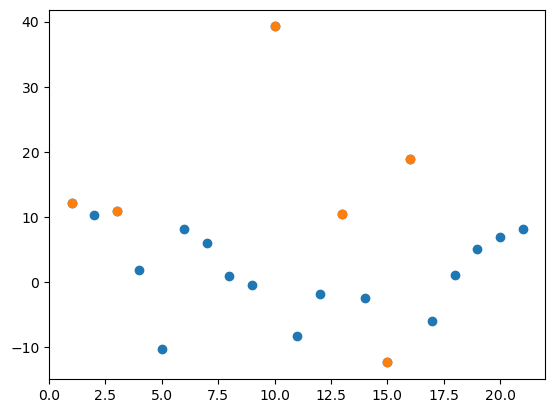

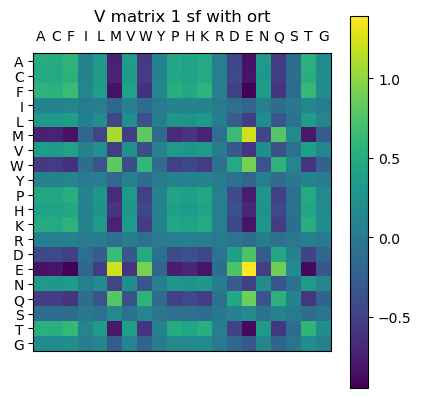

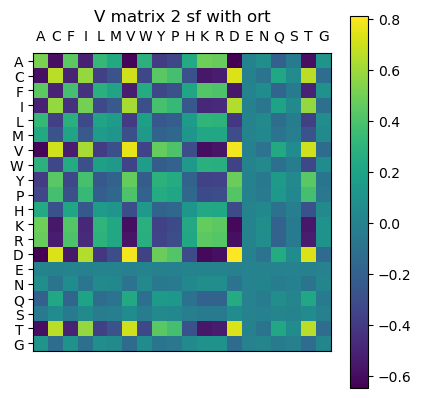

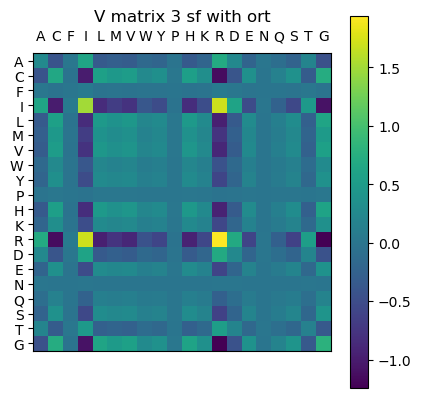

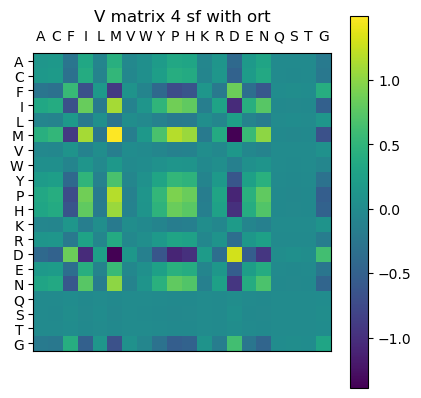

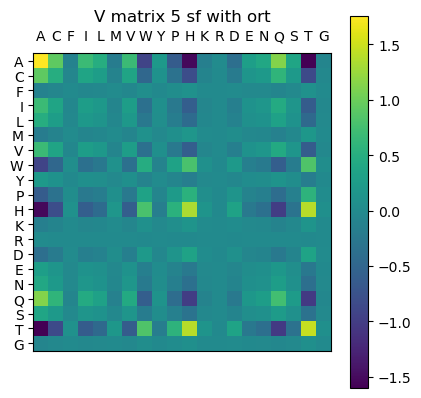

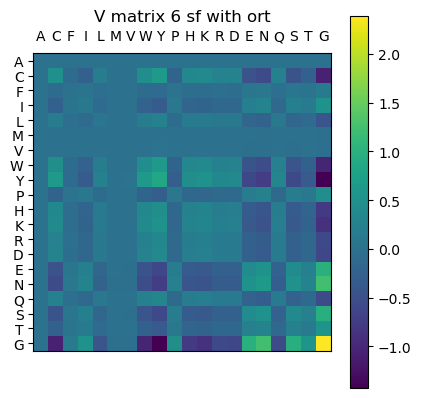

In [20]:
@load "../../DataAttentionDCA/data/PF00014/orttrue_parsH21η0.05λ0.001T60.jld2"
m1 = m ;
#single family
@tullio VV[a, b, h] := m1.V[a,h]*m1.V[b,h]
@tullio ll[h] := m1.K[i,j,h]*(j!=i);
close("all"); scatter(1:length(ll), ll)
scatter(sortperm(abs.(ll), rev=true)[1:n_eig], ll[sortperm(abs.(ll), rev=true)][1:n_eig])
ex_var = round.(abs.(ll[sortperm(abs.(ll), rev=true)][1:n_eig]) ./ sum(abs.(ll)), digits = 3) 
#plot(1:n_eig, cumsum(ex_var), label = "Explained Variance")
#plt.legend()
for i in 1:n_eig
    int_matr(VV[order_Martin, order_Martin,sortperm(abs.(llh), rev=true)[i]],
        titolo = true, nametitle = "V matrix $(i) sf with ort"); 
end

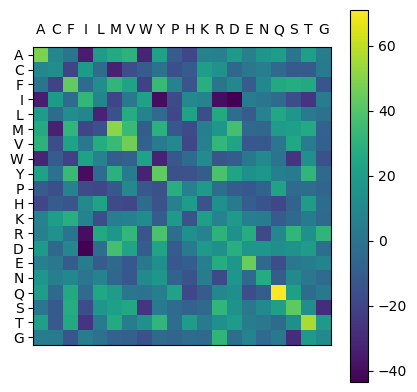

PyObject <matplotlib.colorbar.Colorbar object at 0x7fa833a37940>

In [21]:
@tullio e[a,b] := ll[h] * VV[a,b,h]
int_matr(e[order_Martin, order_Martin])

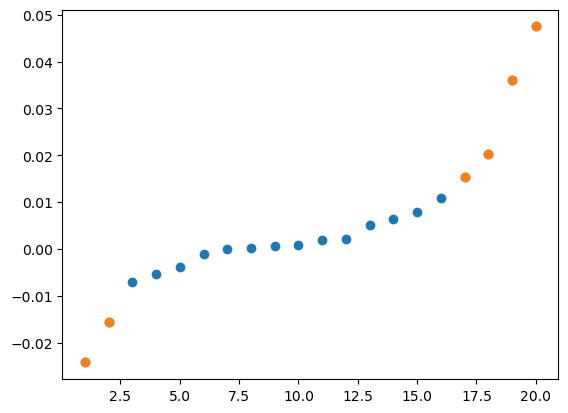

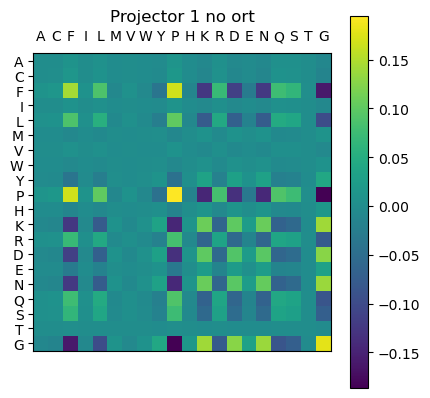

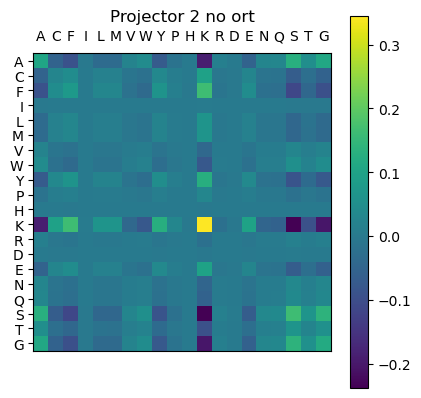

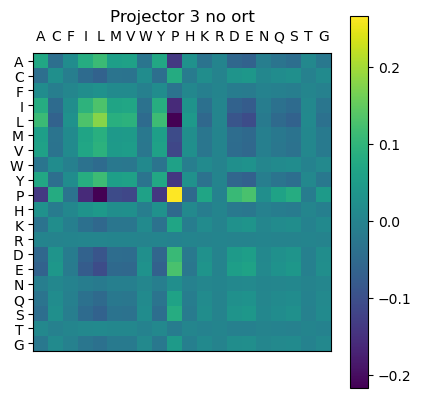

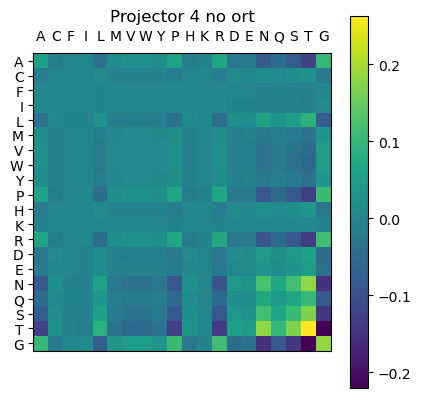

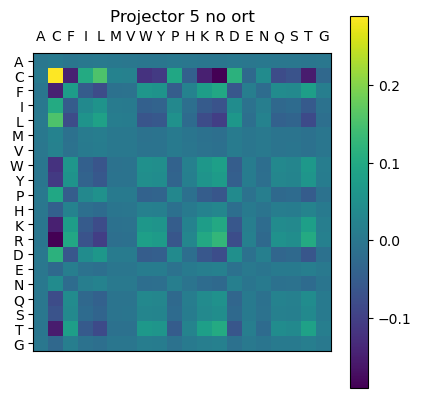

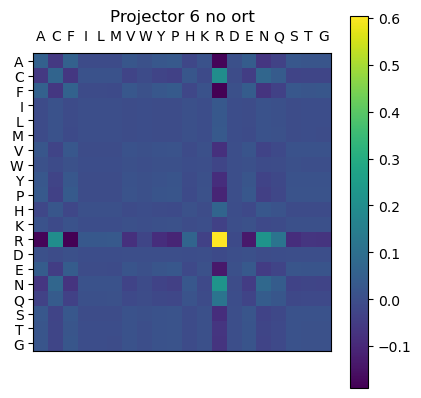

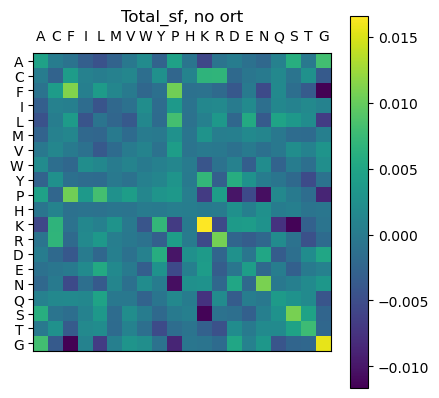

PyObject <matplotlib.colorbar.Colorbar object at 0x7fa8338c4c10>

In [23]:
@load "../../DataAttentionDCA/data/PF00014/ortfalse_parsH21η0.5λ0.001T200.jld2"
m1 = m ;
#single family
Nf = length(m1.K);
H = size(m1.V,2)
@tullio JJ[i,j,a,b] := m1.K[i,j,h]*m1.V[a,h]*m1.V[b,h]*(j!=i) 
J0 = mean(mean(JJ, dims = 3), dims=4)  
JJ_zs = JJ .- mean(JJ, dims = 3) .- mean(JJ, dims = 4) .+ J0
e_all = dropdims(dropdims(mean(mean(JJ_zs, dims = 1), dims=2),dims=1),dims=1)[1:q,1:q]
l, vv = eigen(e_all[order_Martin, order_Martin])
close("all"); scatter(1:length(l), l)
scatter(sortperm(abs.(l), rev=true)[1:n_eig], l[sortperm(abs.(l), rev=true)][1:n_eig])
ex_var = round.(abs.(l[sortperm(abs.(l), rev=true)][1:n_eig]) ./ sum(abs.(l)), digits = 3) 
#plot(1:n_eig, cumsum(ex_var), label = "Explained Variance")
#plt.legend()
for i in 1:n_eig
    int_matr(vv[1:q,sortperm(abs.(l), rev=true)[i]]' .* vv[1:q,sortperm(abs.(l), rev=true)[i]], 
        titolo = true, nametitle = "Projector $(i) no ort"); 
end
int_matr(e_all[order_Martin, order_Martin], titolo = true, nametitle = "Total_sf, no ort")



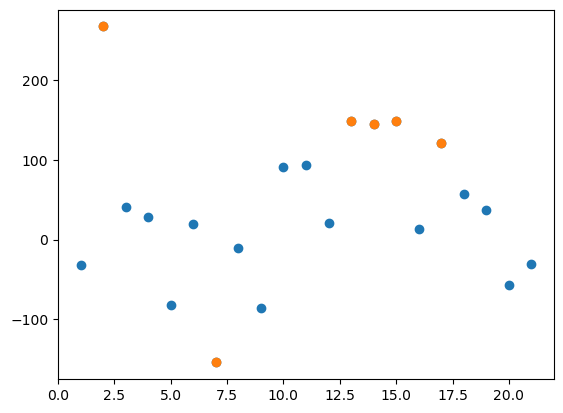

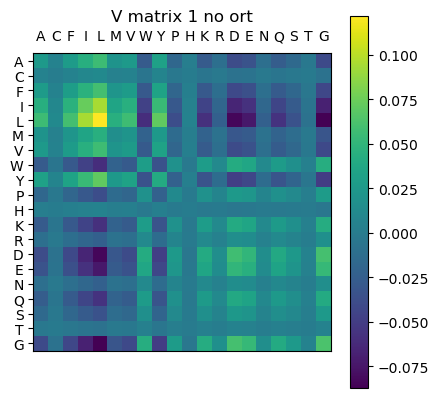

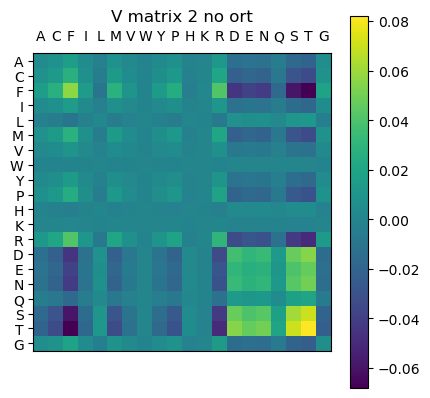

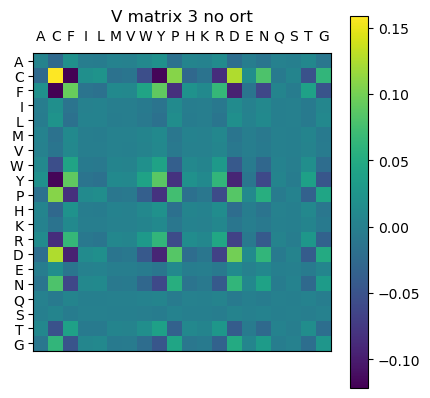

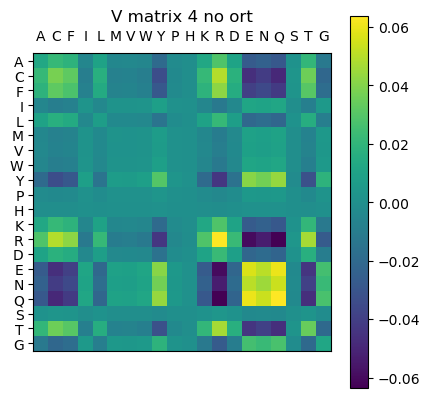

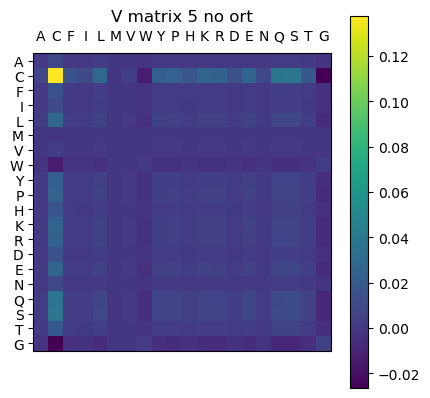

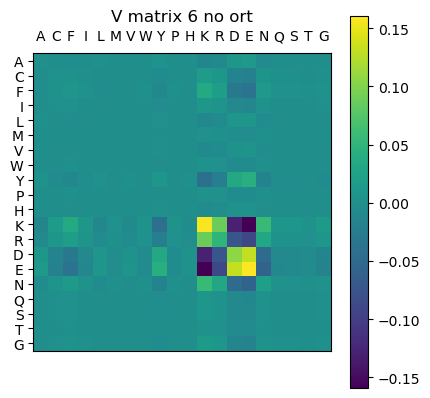

In [27]:
@load "../../DataAttentionDCA/data/PF00014/ortfalse_parsH21η0.5λ0.001T200.jld2"
m1 = m ;
#single family
@tullio VV[a, b, h] := m1.V[a,h]*m1.V[b,h]
@tullio ll[h] := m1.K[i,j,h]*(j!=i);

close("all"); scatter(1:length(ll), ll)
scatter(sortperm(abs.(ll), rev=true)[1:n_eig], ll[sortperm(abs.(ll), rev=true)][1:n_eig])
ex_var = round.(abs.(ll[sortperm(abs.(ll), rev=true)][1:n_eig]) ./ sum(abs.(ll)), digits = 3) 
#plot(1:n_eig, cumsum(ex_var), label = "Explained Variance")
#plt.legend()
for i in 1:n_eig
    int_matr(VV[order_Martin, order_Martin,sortperm(abs.(llh), rev=true)[i]],
        titolo = true, nametitle = "V matrix $(i) no ort"); 
end

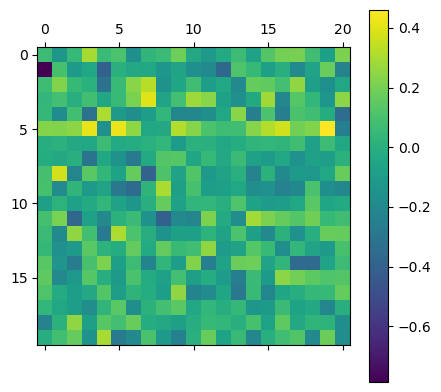

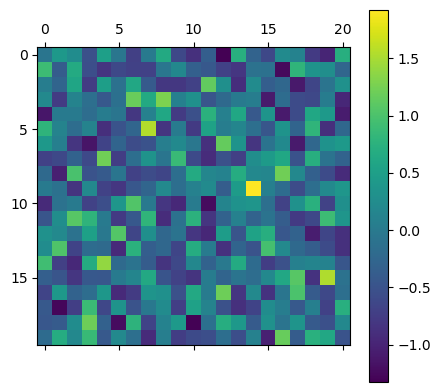

PyObject <matplotlib.colorbar.Colorbar object at 0x7fa8327afe80>

In [25]:
@load "../../DataAttentionDCA/data/PF00014/orttrue_parsH21η0.05λ0.001T60.jld2"
m2 = m ;
matshow(m1.V[1:q,:])
colorbar()
matshow(m2.V[1:q,:])
colorbar()